In [162]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [163]:
data = pd.read_csv('/content/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [133]:
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [134]:
data.columns = data.columns.str.lower()

In [135]:
data.columns

Index(['reviewerid', 'asin', 'reviewername', 'helpful', 'reviewtext',
       'overall', 'summary', 'unixreviewtime', 'reviewtime'],
      dtype='object')

In [136]:
data.isna().sum()

reviewerid         0
asin               0
reviewername      27
helpful            0
reviewtext         7
overall            0
summary            0
unixreviewtime     0
reviewtime         0
dtype: int64

In [164]:
data.shape

(10261, 9)

In [165]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [140]:
data1 = data.copy()

In [166]:
data.drop_duplicates(subset=['reviewText'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)

In [167]:
data.shape

(10227, 9)

In [168]:
data.shape[0]

10227

In [169]:
data.shape[1]

9

In [170]:

data['overall'].value_counts()

5.0    6912
4.0    2079
3.0     771
2.0     249
1.0     216
Name: overall, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings')

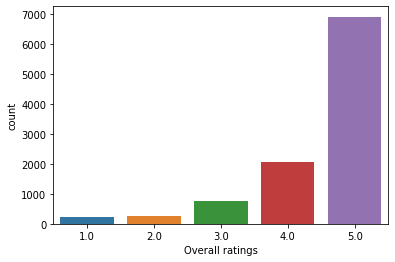

In [171]:
sns.countplot(data['overall'])
plt.xlabel('Overall ratings')

In [172]:
# replacing numerical values with categorical values to reduce the classes to sentiments

data['sentiment'] = data.overall.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

In [173]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",positive


In [177]:
data['reviewtext'].head(20)

KeyError: ignored

In [180]:

X_data = ' ' + data['summary']
y_data = data['sentiment']

In [181]:
X_data[0]

' good'

In [182]:
X_data.dtype

dtype('O')

In [203]:
X_data = X_data.astype('str') 

In [204]:
X_data.dtype

dtype('O')

In [202]:
X_data_df = pd.DataFrame(data=X_data)

In [186]:
X_data_df.columns

Index(['summary'], dtype='object')

In [187]:
X_data_df.columns=['review']

In [188]:
X_data_df.head()

,review
0,good
1,Jake
2,It Does The Job Well
3,GOOD WINDSCREEN FOR THE MONEY
4,No more pops when I record my vocals.


In [223]:
import nltk
nltk.download('stopwords')

  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [247]:
# creating functions for text processing
import string


string.punctuation
def final(X_data_full):
    
    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
   
        
    # function for lemmatizing
    from nltk.stem import PorterStemmer, WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [248]:

#call the function
clear_text = []
for t in X_data:
    cleaned_text.append(final(t)) 

LookupError: ignored

In [231]:
  def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
       

In [255]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())#call the function


AttributeError: ignored

In [233]:
cleaned_text[:5]

[' good',
 ' jake',
 ' it does the job well',
 ' good windscreen for the money',
 ' no more pops when i record my vocals ']

In [235]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())
    
 

In [239]:
  def tokenize_words(X_data_func):

        import nltk
        
        words = nltk.word_tokenize(X_data_func)
        return words
       

In [243]:
cleaned_text1 = []
for t in X_data:
    cleaned_text1.append(word_tokenize(t)) 

LookupError: ignored

In [244]:
 def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2

In [245]:
cleaned_text = []
for t in X_data:
    cleaned_text.append(remove_stopwords(t))

[' good',
 ' Jake',
 ' It Does The Job Well',
 ' GOOD WINDSCREEN FOR THE MONEY',
 ' No  pops  I record  vocals.',
 ' The Best Cable',
 " Monster Standard 100 - 21' Instrument Cable",
 " Didn' fit  1996 Fender Strat...",
 ' Great cable',
 ' Best Instrument Cables On The Market',
 ' One   best instrument cables within  brand',
 ' It works great  I hardly use  .',
 ' HAS TO GET USE TO THE SIZE',
 ' awesome',
 ' It works!',
 ' Definitely Not For The Seasoned Piano Player',
 ' Durable Instrument Cable',
 ' fender 18 ft. Cali clear...',
 ' So far  good.  Will revisit   6 month mark ;)',
 ' Add California   name  I jump!',
 ' Cheap  cool looking, good length',
 ' Fender 18 Feet California Clear Instrument Cable - Lake Placid Blue',
 ' Guitar Cable',
 ' Quality cable!',
 ' I Got Great Pricing, But Still  Really Good Product',
 ' Its  Hosa',
 ' Quality  Secure',
 ' Midi  Midi',
 ' Very Heavy Cables At Affordable Price',
 ' Still going',
 " Does   ' supposed   ",
 ' Good cable',
 ' Good Enough',

In [261]:
from sklearn.model_selection import train_test_split 
cleaned_text = np.asarray(cleaned_text)

X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y_data, test_size=0.25, random_state= 42)


In [264]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[0]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7670, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
_________________________________________________________________
None


In [265]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [266]:
#train the model
model.fit(X_train, y_train_dummies, epochs=100, batch_size=32)

NameError: ignored

In [270]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
x_train_dummies = pd.get_dummies(X_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (7670, 3)


In [271]:
#train the model
model.fit(x_train_dummies, y_train_dummies, epochs=100, batch_size=32)

Epoch 1/100


ValueError: ignored

In [276]:
X1 = x_train_dummies.reshape((-1, x_train_dummies.shape[1], 0))

ValueError: ignored

In [277]:
model.fit(X1, y_train_dummies, epochs=100, batch_size=32)

ValueError: ignored